In [1]:
import numpy as np
import pandas as pd

import scipy
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [3]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


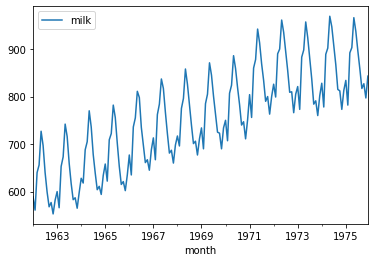

In [4]:
milk.plot()
plt.show()

In [5]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk['milk'])

(-1.3038115874221343,
 0.6274267086030294,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [49]:
from calendar import monthrange
milk['month'] = pd.DatetimeIndex(milk.index).month
milk['year'] = pd.DatetimeIndex(milk.index).year
milk['daily'] = [0]*milk.shape[0]
for i in range(milk.shape[0]):
    milk.daily[i] = milk['milk'][i] / monthrange(year = milk['year'][i], month = milk['month'][i])[1]

<AxesSubplot:xlabel='month'>

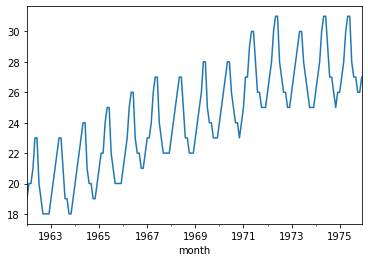

In [50]:
milk.daily.plot()

In [51]:
milk.daily_diff1 = milk.daily - milk.daily.shift(1)

<ipython-input-51-94af637a0b55>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  milk.daily_diff1 = milk.daily - milk.daily.shift(1)


<AxesSubplot:xlabel='month'>

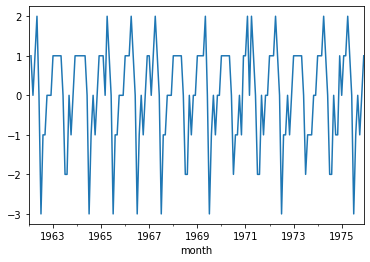

In [58]:
milk.daily_diff1.plot()

In [55]:
sm.tsa.stattools.adfuller(milk.daily_diff1.dropna())

(-3.1996430632040584,
 0.020005349420570324,
 13,
 153,
 {'1%': -3.473829775724492,
  '5%': -2.880622899711496,
  '10%': -2.5769448985432954},
 230.53730678570238)

In [56]:
milk.daily_diff2 = milk.daily - milk.daily.shift(12)

<ipython-input-56-4b1e97fc7800>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  milk.daily_diff2 = milk.daily - milk.daily.shift(12)


<AxesSubplot:xlabel='month'>

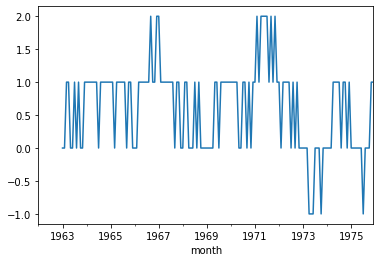

In [59]:
milk.daily_diff2.plot()

In [60]:
sm.tsa.stattools.adfuller(milk.daily_diff2.dropna())

(-2.2338165968820576,
 0.19420165222112817,
 13,
 142,
 {'1%': -3.477261624048995,
  '5%': -2.8821181874544233,
  '10%': -2.5777431104939494},
 193.74044327907893)

<ipython-input-61-fc18500cc298>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  milk.daily_diff3 = milk.daily_diff2 - milk.daily_diff2.shift(1)


<AxesSubplot:xlabel='month'>

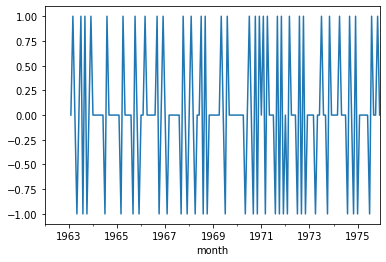

In [61]:
milk.daily_diff3 = milk.daily_diff2 - milk.daily_diff2.shift(1)
milk.daily_diff3.plot()

In [62]:
sm.tsa.stattools.adfuller(milk.daily_diff3.dropna())

(-5.284003941253652,
 5.9092531019104346e-06,
 12,
 142,
 {'1%': -3.477261624048995,
  '5%': -2.8821181874544233,
  '10%': -2.5777431104939494},
 196.0960489635429)

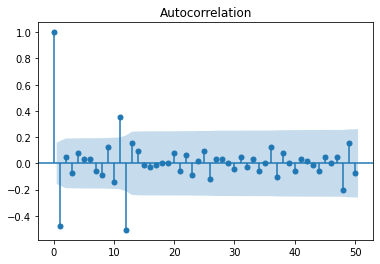

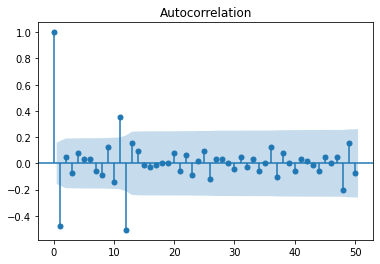

In [64]:
sm.graphics.tsa.plot_acf(milk.daily_diff3.dropna().values.squeeze(), lags=50)

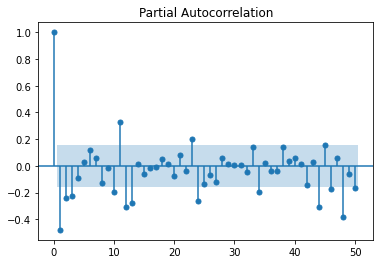

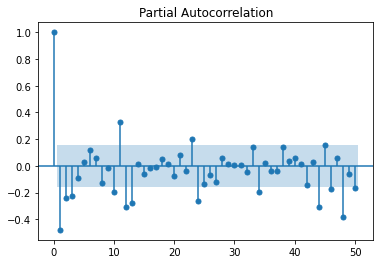

In [65]:
sm.graphics.tsa.plot_pacf(milk.daily_diff3.dropna().values.squeeze(), lags=50)